# 1. Preprocessing
This section handles missing values, encodes categorical variables, and normalizes numerical features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
adult_df = pd.read_csv('adult.csv')

# Replace "?" with NaN
adult_df = adult_df.replace(' ?', np.nan)

# Drop rows with missing values
adult_df_cleaned = adult_df.dropna()

# Separate features and target variable
X = adult_df_cleaned.drop('income', axis=1)
y = adult_df_cleaned['income']

# Encode categorical variables using OneHotEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X[categorical_columns])

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Concatenate encoded categorical columns back to the dataframe
X_encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
X_numerical = X.drop(categorical_columns, axis=1).reset_index(drop=True)
X_final = pd.concat([X_numerical, X_encoded_df], axis=1)

# Normalize numerical features
scaler = StandardScaler()
X_final[X_numerical.columns] = scaler.fit_transform(X_numerical)

# Display the preprocessed data
print(X_final.head())
print(y_encoded[:5])


C:\Users\Rajeevkumar Singh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954        -0.030373     -0.144804     -0.217127   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.034087                    0.0                  0.0   
1        0.772930                    0.0                  0.0   
2       -0.034087                    0.0                  1.0   
3       -0.034087                    0.0                  0.0   
4       -0.841104                    0.0                  0.0   

   workclass_Never-worked  workclass_Private  ...  native-country_Portugal  \
0                     0.0                1.0  ...                      0.0   
1                     0.0       

# 2. Exploratory Data Analysis (EDA)
This section includes visualizing the distributions of numerical features and analyzing the relationship between these features and the target variable.

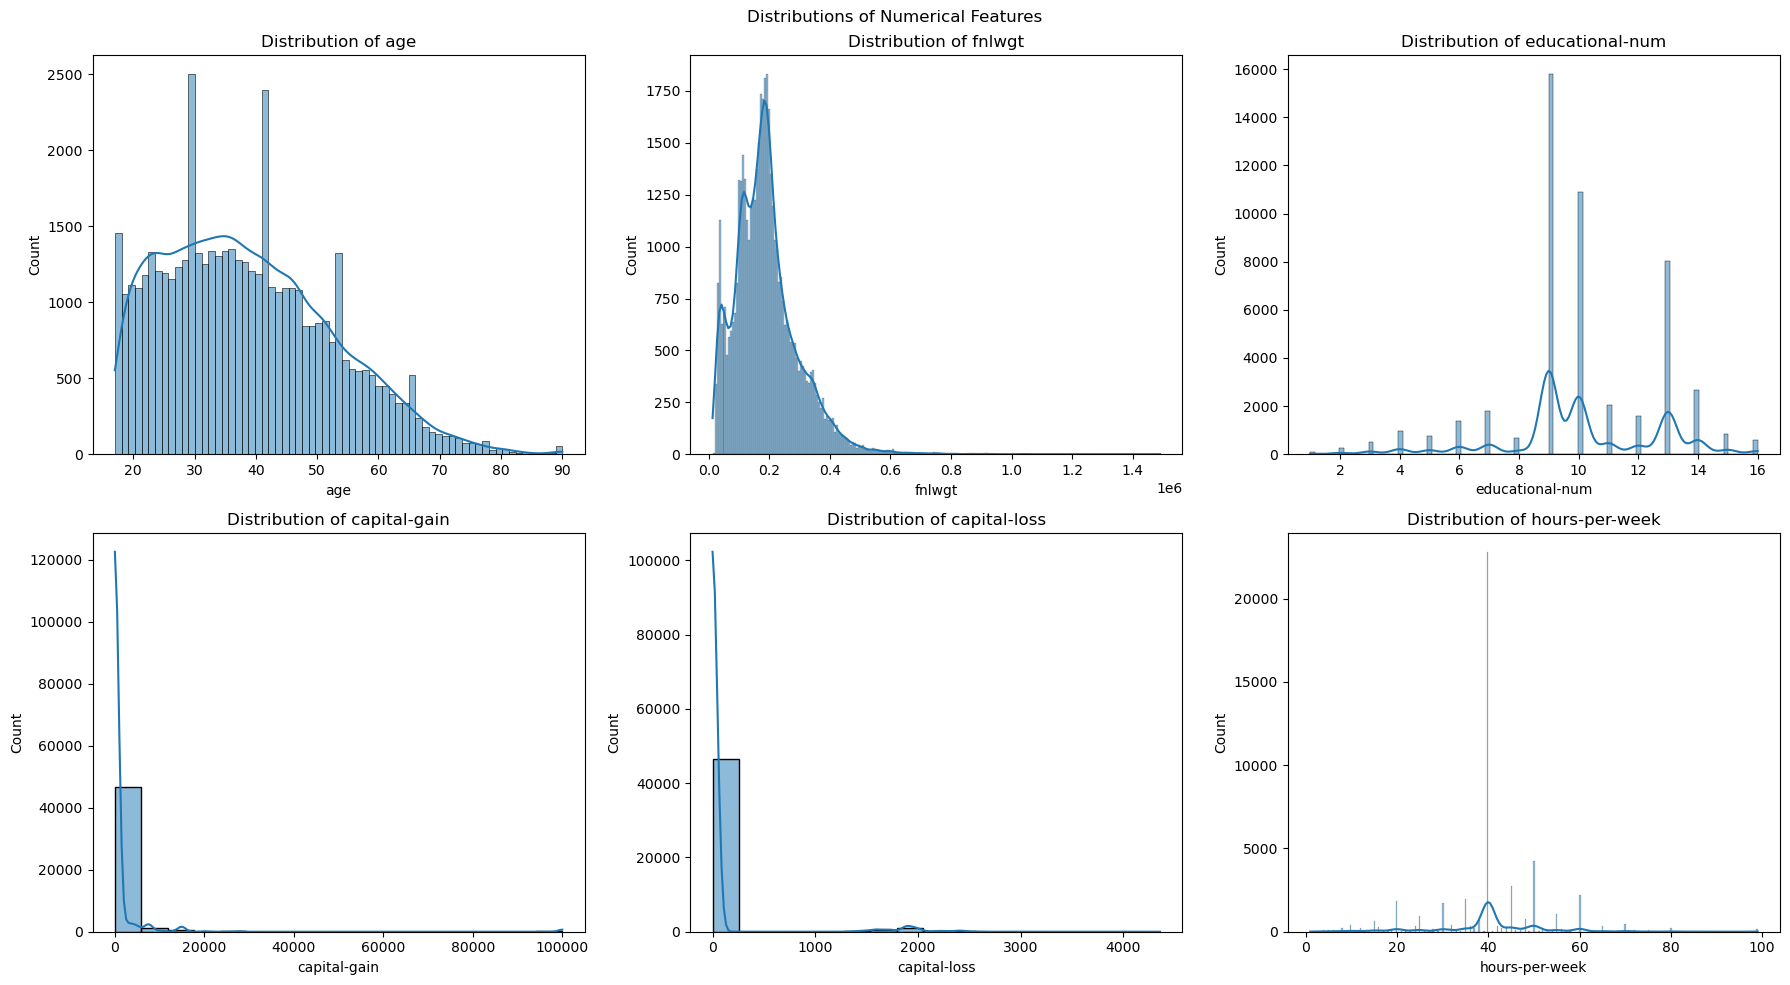

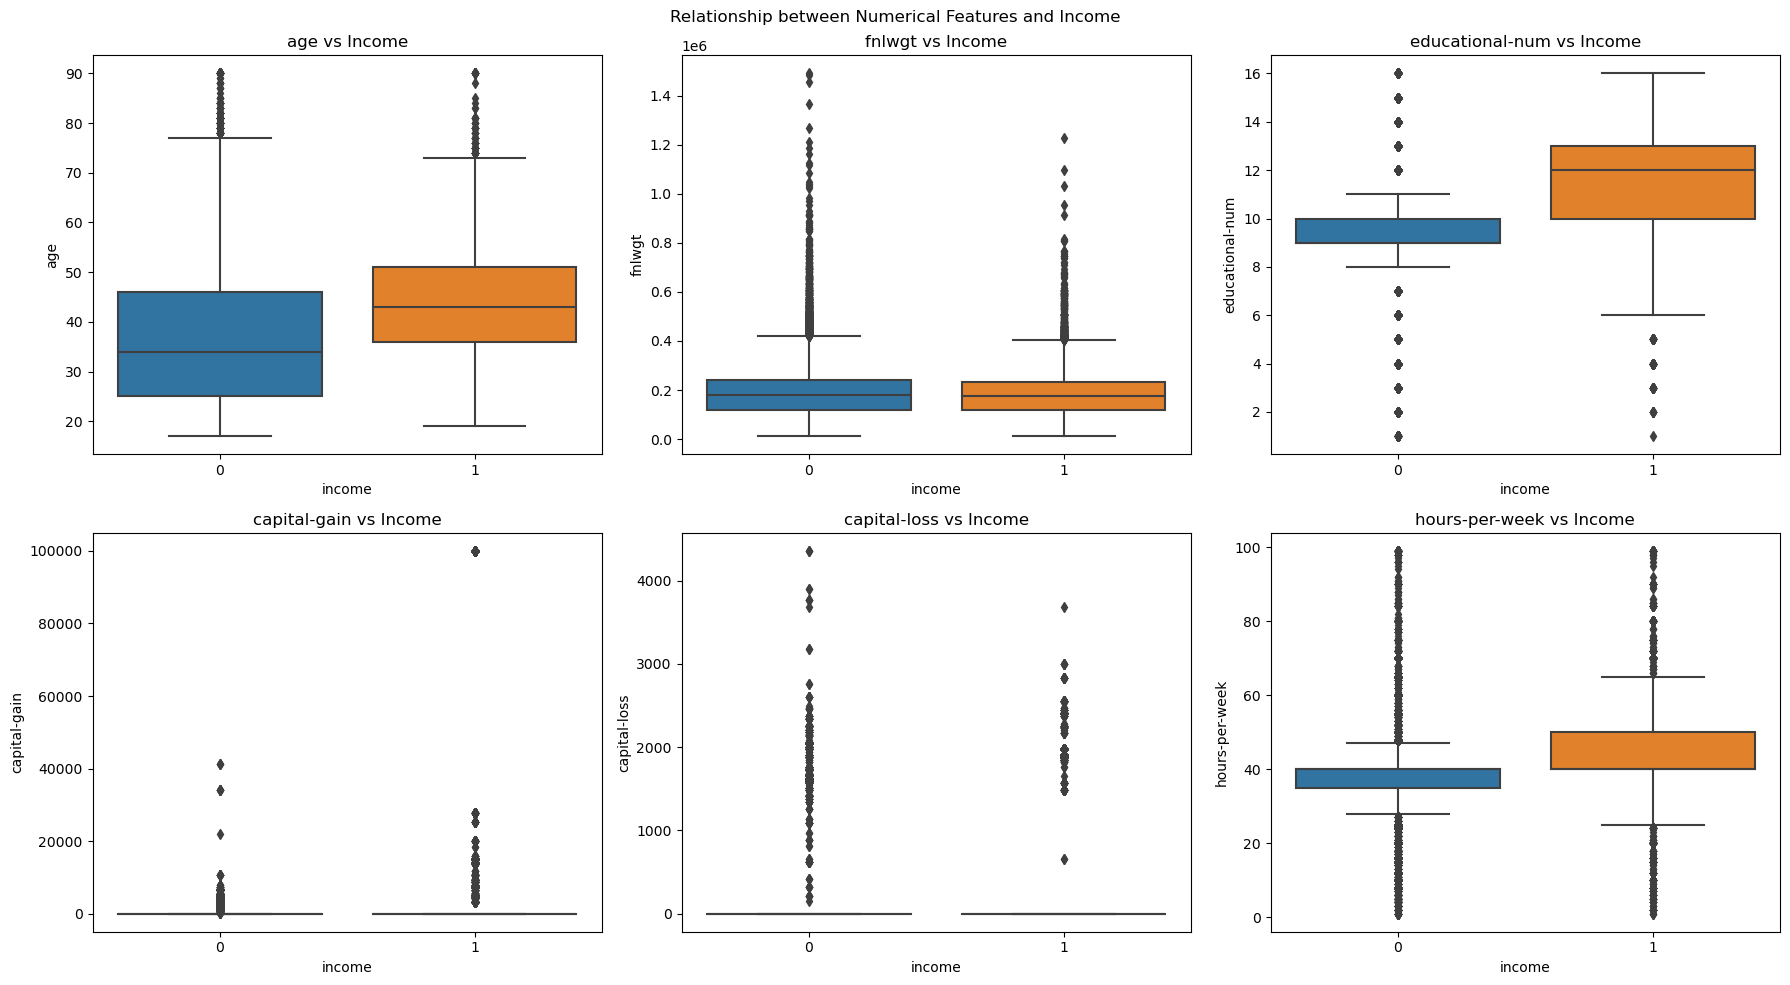

In [2]:
# Create a dataframe for visualization purposes (combine features and target)
visualization_df = pd.concat([X_numerical, pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns)), pd.Series(y_encoded, name='income')], axis=1)

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distributions of Numerical Features')

numerical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for i, col in enumerate(numerical_columns):
    sns.histplot(data=visualization_df, x=col, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Analyze the relationship between features and the target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relationship between Numerical Features and Income')

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=visualization_df, x='income', y=col, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} vs Income')

plt.tight_layout()
plt.show()


# 3. Modeling and Evaluation
Train and evaluate different machine learning models.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Model: Logistic Regression
Accuracy: 0.8572
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.61      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.8206
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.61      0.64      0.63      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.8608
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      